In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/Users/jjong/Desktop/vscode/kaggle_src/insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


C:\Users\jjong\AppData\Local\Temp\ipykernel_6836\2552638149.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=data['age'], kde=True, palette='spring')


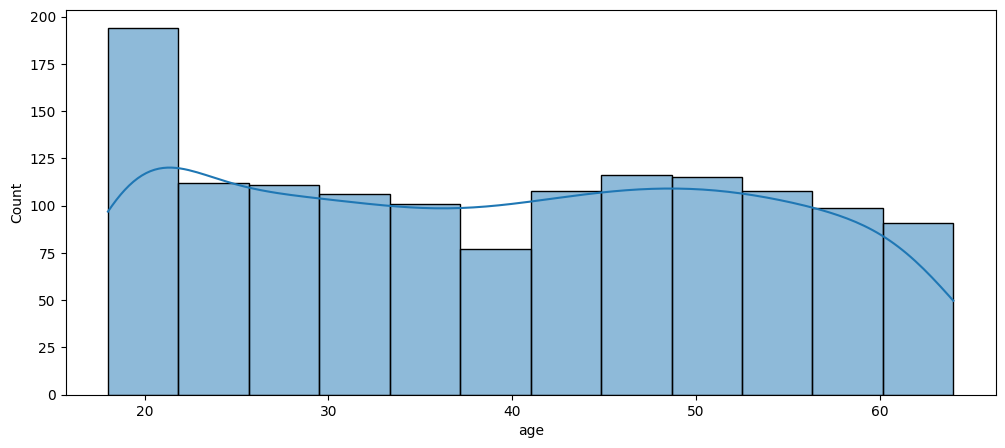

In [3]:
plt.figure(figsize=(12,5))
sns.histplot(x=data['age'], kde=True, palette='spring')
plt.show()

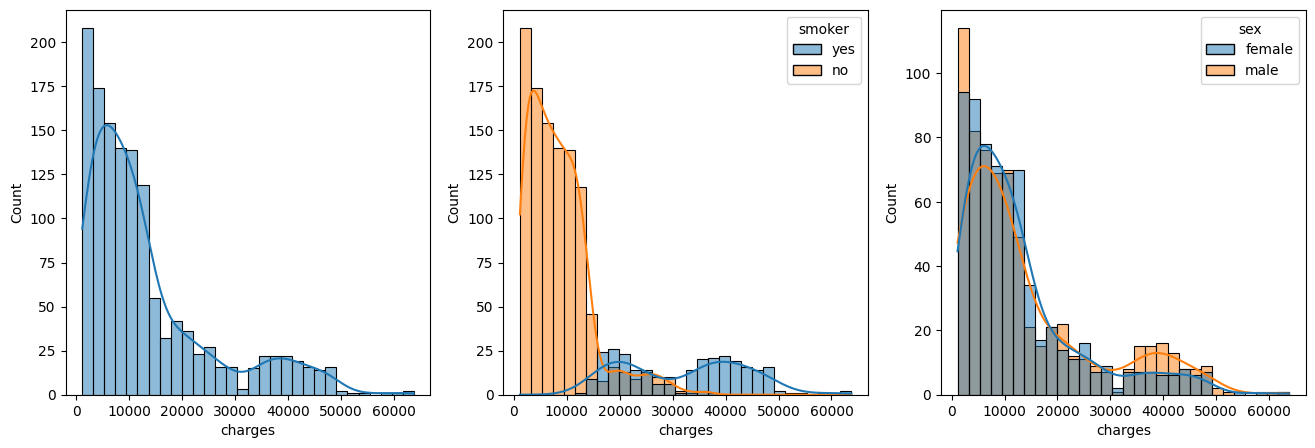

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(16, 5))
sns.histplot(x='charges', data=data, kde=True, ax=ax[0])
sns.histplot(x='charges', data=data, kde=True, hue='smoker', ax=ax[1])
sns.histplot(x='charges', data=data, kde=True, hue='sex', ax=ax[2])
plt.show()

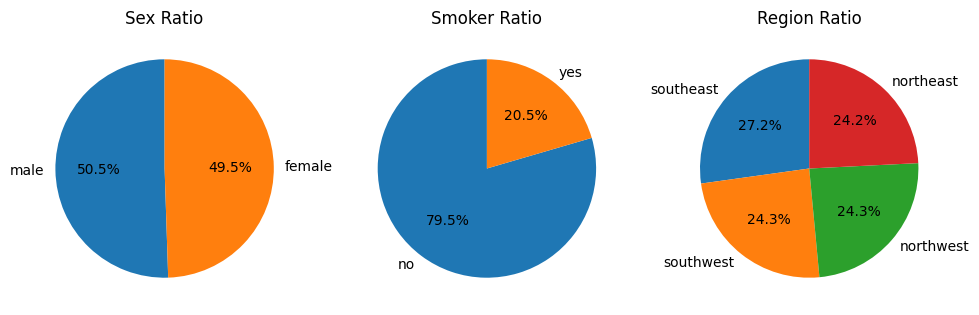

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(10,5))
axes[0].pie(x=data['sex'].value_counts(), labels=data['sex'].value_counts().index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Sex Ratio')
axes[1].pie(x=data['smoker'].value_counts(), labels=data['smoker'].value_counts().index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Smoker Ratio')
axes[2].pie(x=data['region'].value_counts(), labels=data['region'].value_counts().index, autopct='%1.1f%%', startangle=90)
axes[2].set_title('Region Ratio')
plt.tight_layout()
plt.show()

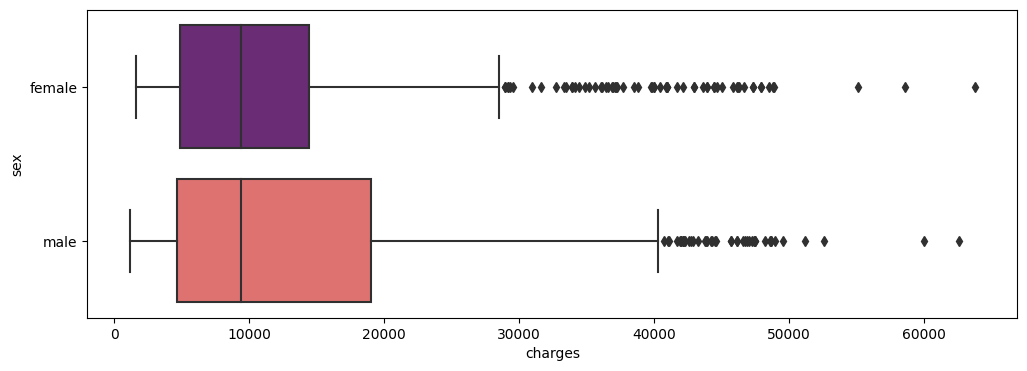

In [6]:
sex = data.groupby('sex')['charges'].mean()
plt.figure(figsize=(12,4))
sns.boxplot(y=data['sex'], x=data['charges'], palette='magma')
# plt.yscale('log')
plt.show()

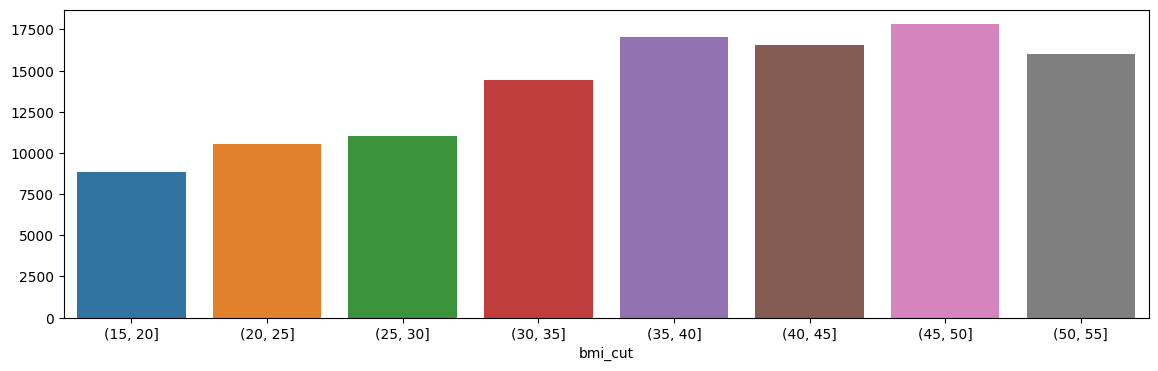

In [4]:
data['bmi_cut'] = pd.cut(data['bmi'], bins=np.arange(15, 60, 5), right=True)
bmi_cut = data.groupby('bmi_cut')['charges'].mean()
plt.figure(figsize=(14,4))
sns.barplot(x=bmi_cut.index, y=bmi_cut.values)
plt.show()

c:\Users\jjong\Desktop\vscode\CWNU_ICT\tensor\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

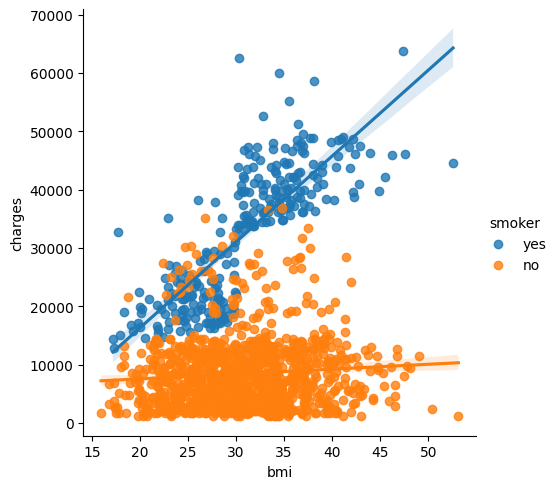

In [12]:
plt.figure()
sns.lmplot(data=data, x='bmi', y='charges', hue='smoker')
plt.show()

<Figure size 640x480 with 0 Axes>

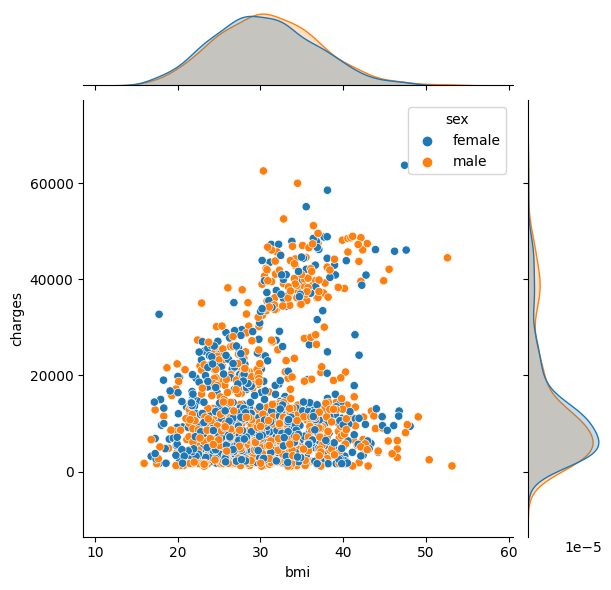

In [29]:
plt.figure()
sns.jointplot(x=data['bmi'], y=data['charges'], hue=data['sex'], color='c')
plt.show()

c:\Users\jjong\Desktop\vscode\CWNU_ICT\tensor\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

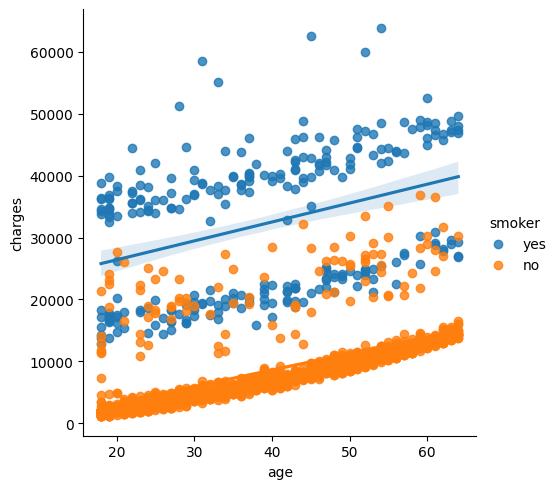

In [8]:
plt.figure()
sns.lmplot(x='age', y='charges', hue='smoker', data=data)
plt.show()

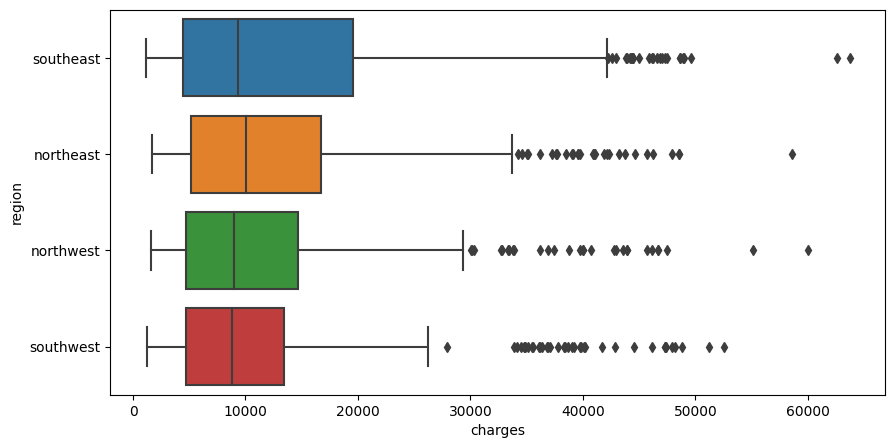

In [41]:
region_order = data.groupby('region')['charges'].mean().reset_index().sort_values(by='charges', ascending=False)['region'].tolist()
plt.figure(figsize=(10,5))
sns.boxplot(x='charges', y='region', data=data, order=region_order)
plt.show()

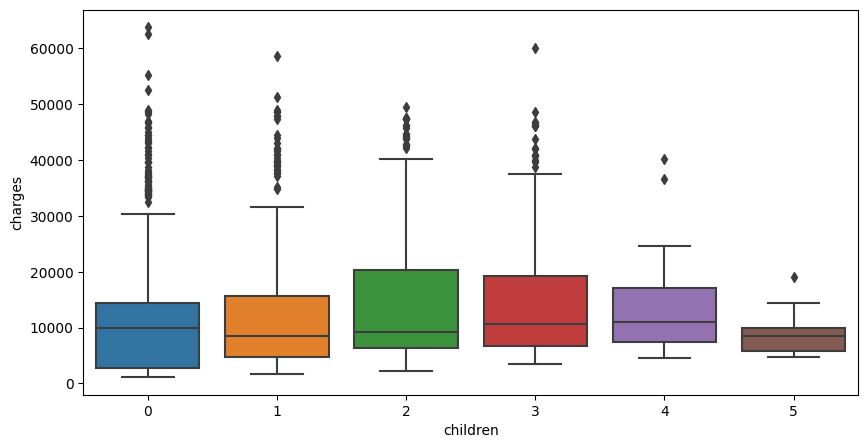

In [57]:
plt.figure(figsize=(10,5))
sns.boxplot(x='children', y='charges', data=data)
plt.show()

In [61]:
data

,age,sex,bmi,children,smoker,region,charges,bmi_cut
0,19,female,27.900,0,yes,southwest,16884.92400,"(25, 30]"
1,18,male,33.770,1,no,southeast,1725.55230,"(30, 35]"
2,28,male,33.000,3,no,southeast,4449.46200,"(30, 35]"
3,33,male,22.705,0,no,northwest,21984.47061,"(20, 25]"
4,32,male,28.880,0,no,northwest,3866.85520,"(25, 30]"
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,"(30, 35]"
1334,18,female,31.920,0,no,northeast,2205.98080,"(30, 35]"
1335,18,female,36.850,0,no,southeast,1629.83350,"(35, 40]"
1336,21,female,25.800,0,no,southwest,2007.94500,"(25, 30]"


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

df = data.drop('bmi_cut', axis=1).copy()
df['sex'] = df['sex'].map(lambda x: 0 if x == 'male' else 1)
df['smoker'] = df['smoker'].map(lambda x: 0 if x == 'no' else 1)
df = pd.get_dummies(df)

X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [6]:
X_train.shape, y_train.shape

((1070, 9), (1070,))

In [7]:
scaler = MinMaxScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[0.41304348, 1.        , 0.61250683, ..., 0.        , 1.        ,
        0.        ],
       [0.7826087 , 1.        , 0.4565811 , ..., 0.        , 0.        ,
        0.        ],
       [0.17391304, 0.        , 0.83478973, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.60869565, 1.        , 0.38885855, ..., 0.        , 0.        ,
        1.        ],
       [0.63043478, 0.        , 0.62752594, ..., 0.        , 1.        ,
        0.        ],
       [0.32608696, 0.        , 0.39022392, ..., 0.        , 1.        ,
        0.        ]])

In [22]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=7, min_samples_leaf=2, min_samples_split=2)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

Validation Set:
MAE: 2966.3416151229326
MSE: 30097122.74374169
RMSE: 5486.0844637812215
MAPE: 0.3798174140860732


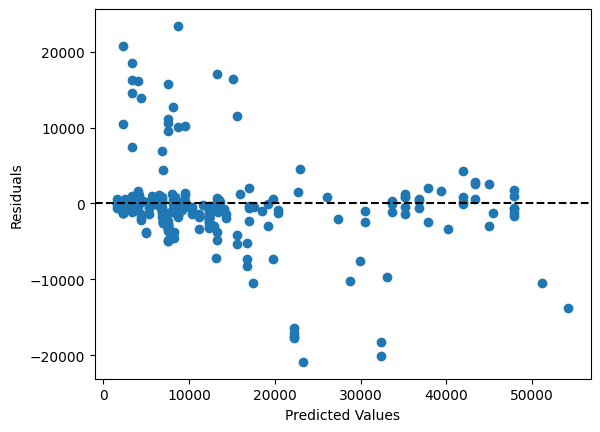

In [24]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print('Validation Set:')
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAPE:', mape)

# 잔차 그래프 그리기
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='black', linestyle='--')
# plt.xscale('log')
# plt.yscale('log')
plt.show()

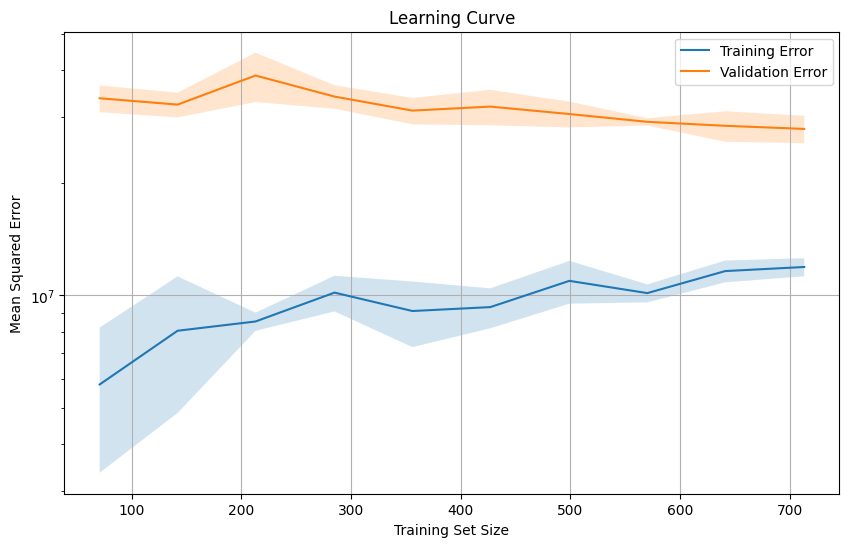

In [25]:
from sklearn.model_selection import GridSearchCV, learning_curve, validation_curve


# 학습곡선
sizes, train_scores, val_scores = learning_curve(estimator=dt, X=X_train, y=y_train,
                                                train_sizes=np.linspace(0.1, 1.0, 10),
                                                cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = -np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(sizes, train_mean, label='Training Error')
plt.fill_between(sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(sizes, val_mean, label='Validation Error')
plt.fill_between(sizes, val_mean - val_std, val_mean + val_std, alpha=0.2)

plt.yscale('log')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.legend(loc='best')
plt.grid(True)
plt.show()

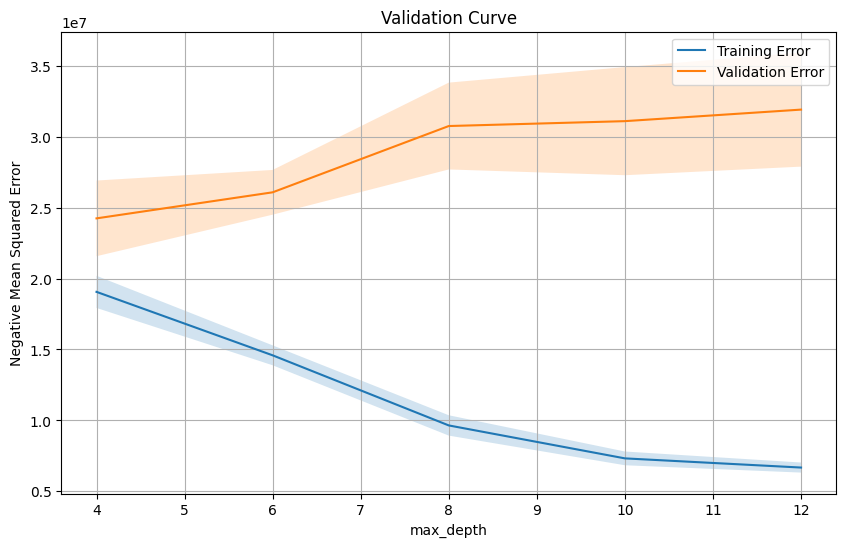

In [27]:
# 검증곡선
param_range = [4, 6, 8, 10, 12]
train_scores, test_scores = validation_curve(dt, X_train, y_train, param_name="max_depth", 
                                             param_range=param_range, cv=3, scoring="neg_mean_squared_error", n_jobs=-1)

train_mean = -np.mean(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label='Training Error')
plt.fill_between(param_range, train_mean+train_std, train_mean-train_std, alpha=0.2)

plt.plot(param_range, test_mean, label='Validation Error')
plt.fill_between(param_range, test_mean+test_std, test_mean-test_std, alpha=0.2)

# plt.yscale('log')
plt.xlabel('max_depth')
plt.ylabel('Negative Mean Squared Error')
plt.title('Validation Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [13]:
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
# 탐색할 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

# 그리드 탐색 수행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Parameters:", grid_search.best_params_)

# 최적의 모델로 평가
best_rf = grid_search.best_estimator_
rf_pred = best_rf.score(X_test, y_test)
print("Test Accuracy:", rf_pred)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Test Accuracy: 0.8839232949572842


In [14]:
rf = RandomForestRegressor(n_estimators=300, max_depth=5, min_samples_split=2, min_samples_leaf=4, random_state=0)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

Validation Set:
MAE: 2335.130706162356
MSE: 17554375.422319673
RMSE: 4189.794198086544
MAPE: 0.29614974325714416


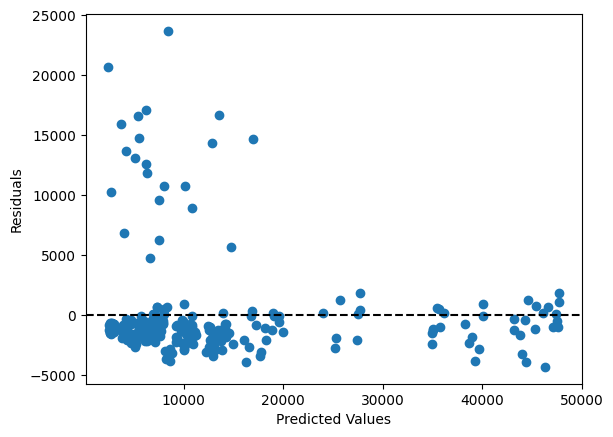

In [15]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print('Validation Set:')
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAPE:', mape)

# 잔차 그래프 그리기
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='black', linestyle='--')
# plt.xscale('log')
# plt.yscale('log')
plt.show()

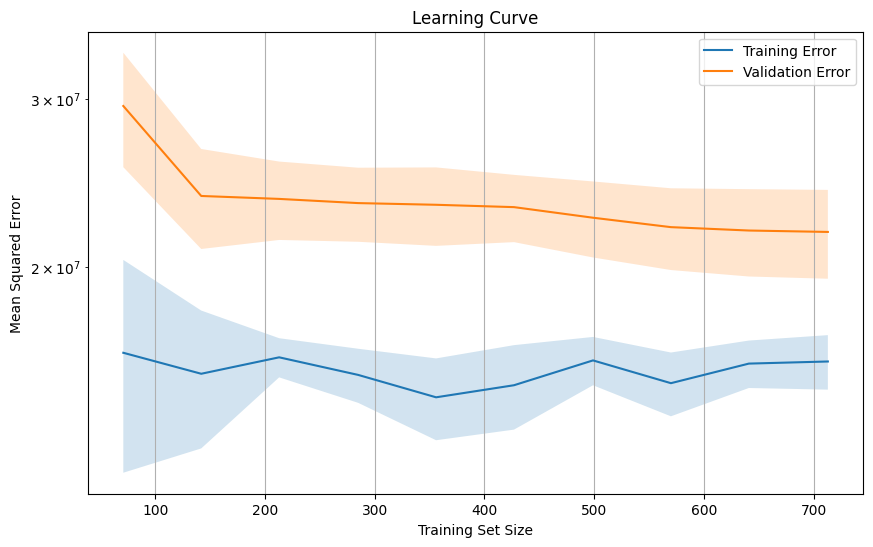

In [16]:
# 학습곡선
sizes, train_scores, val_scores = learning_curve(estimator=rf, X=X_train, y=y_train,
                                                train_sizes=np.linspace(0.1, 1.0, 10),
                                                cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = -np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(sizes, train_mean, label='Training Error')
plt.fill_between(sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(sizes, val_mean, label='Validation Error')
plt.fill_between(sizes, val_mean - val_std, val_mean + val_std, alpha=0.2)

plt.yscale('log')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [10]:
import xgboost as xgb

xg = xgb.XGBRegressor()
# 탐색할 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=xg, param_grid=param_grid, cv=5, n_jobs=-1)

# 그리드 탐색 수행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Parameters:", grid_search.best_params_)

# 최적의 모델로 평가
best_rf = grid_search.best_estimator_
rf_pred = best_rf.score(X_test, y_test)
print("Test Accuracy:", rf_pred)

Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.8}
Test Accuracy: 0.8885471607511973


In [11]:
xg = xgb.XGBRegressor(max_depth=3, n_estimators=500, learning_rate=0.01, colsample_bytree=1.0, subsample=0.8, gamma=0, random_state=0)

xg.fit(X_train, y_train)

y_pred = xg.predict(X_test)

Validation Set:
MAE: 2233.8179265202307
MSE: 16965899.01634715
RMSE: 4118.968198025708
MAPE: 0.29340369294660845


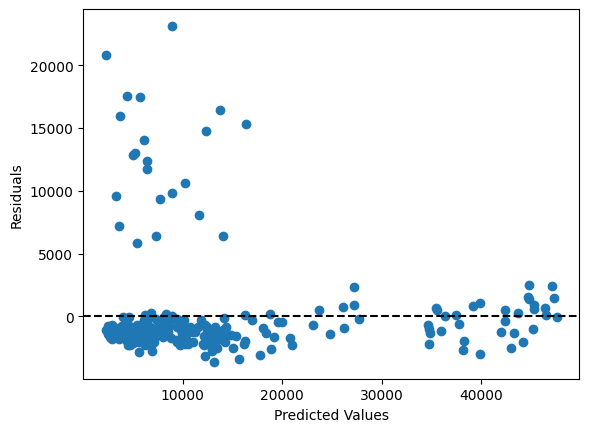

In [12]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print('Validation Set:')
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAPE:', mape)

# 잔차 그래프 그리기
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='black', linestyle='--')
# plt.xscale('log')
# plt.yscale('log')
plt.show()

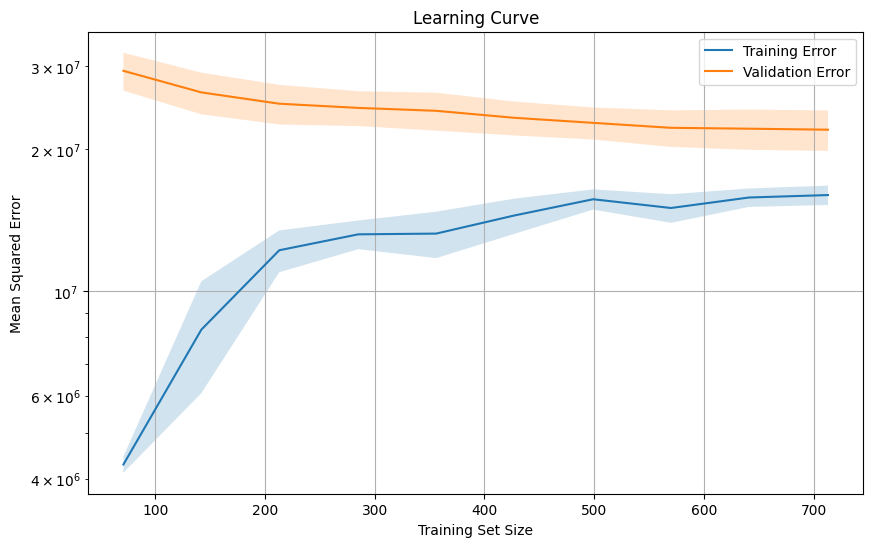

In [13]:
from sklearn.model_selection import GridSearchCV, learning_curve, validation_curve


# 학습곡선
sizes, train_scores, val_scores = learning_curve(estimator=xg, X=X_train, y=y_train,
                                                train_sizes=np.linspace(0.1, 1.0, 10),
                                                cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = -np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(sizes, train_mean, label='Training Error')
plt.fill_between(sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(sizes, val_mean, label='Validation Error')
plt.fill_between(sizes, val_mean - val_std, val_mean + val_std, alpha=0.2)

plt.yscale('log')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [14]:
X_train.shape

(1070, 9)

In [37]:
from tensorflow.keras import layers, Model

inputs = layers.Input(shape=(9,))

x = layers.Dense(64)(inputs)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(256)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(64)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

x = layers.Dense(32)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('linear')(x)

outputs = layers.Dense(1)(x)
model = Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 9)]               0         
                                                                 
 dense_6 (Dense)             (None, 64)                640       
                                                                 
 batch_normalization_5 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 activation_5 (Activation)   (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 batch_normalization_6 (Bat  (None, 128)               512       
 chNormalization)                                          

In [53]:
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping

# X_train이 NumPy 배열인 경우
X_train = X_train.astype('float32')  # 데이터 유형을 float32로 변환

early_stopping = EarlyStopping(monitor='val_mae', patience=200, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_split=0.2, epochs=1000, batch_size=512, callbacks=[early_stopping])

Epoch 1/1000
1/2 [==============>...............] - ETA: 0s - loss: 8095151.5000 - mae: 1692.5476

2/2 [==============================] - 0s 68ms/step - loss: 8503504.0000 - mae: 1808.8785 - val_loss: 26150798.0000 - val_mae: 2764.6519
Epoch 2/1000
2/2 [==============================] - 0s 32ms/step - loss: 9002166.0000 - mae: 1876.7684 - val_loss: 27294776.0000 - val_mae: 2847.4712
Epoch 3/1000
2/2 [==============================] - 0s 32ms/step - loss: 7342707.0000 - mae: 1772.9153 - val_loss: 27855742.0000 - val_mae: 2885.8330
Epoch 4/1000
2/2 [==============================] - 0s 28ms/step - loss: 8217327.5000 - mae: 1827.8546 - val_loss: 27994138.0000 - val_mae: 2909.6296
Epoch 5/1000
2/2 [==============================] - 0s 30ms/step - loss: 8586959.0000 - mae: 1868.1104 - val_loss: 27733724.0000 - val_mae: 2910.2341
Epoch 6/1000
2/2 [==============================] - 0s 38ms/step - loss: 8291118.0000 - mae: 1912.2148 - val_loss: 27302230.0000 - val_mae: 2891.7288
Epoch 7/1000
2/2 [==============================] - 0s 36ms/step - loss: 8108784.5000 - mae: 1882.4784 - val_loss

In [57]:
X_test = X_test.astype('float32')
p_test = model.predict(X_test)
p_test

9/9 [==============================] - 0s 1ms/step


array([[51635.453 ],
       [12256.941 ],
       [ 3545.0193],
       [42844.535 ],
       [ 7908.644 ],
       [17542.451 ],
       [ 1406.544 ],
       [11161.486 ],
       [ 5531.864 ],
       [14130.498 ],
       [11525.602 ],
       [ 3173.6921],
       [ 9263.669 ],
       [ 6084.178 ],
       [ 6401.951 ],
       [24653.691 ],
       [32841.875 ],
       [ 1584.2981],
       [ 2506.1418],
       [20802.973 ],
       [ 8964.209 ],
       [27221.836 ],
       [21229.812 ],
       [35631.22  ],
       [ 2065.7156],
       [ 9728.602 ],
       [ 7326.4746],
       [44687.496 ],
       [11559.961 ],
       [ 9937.279 ],
       [54010.617 ],
       [ 5384.284 ],
       [ 2245.3142],
       [ 1458.6608],
       [ 5290.2056],
       [10970.6   ],
       [17932.57  ],
       [ 5152.3228],
       [16326.965 ],
       [11486.609 ],
       [ 4793.207 ],
       [16433.904 ],
       [ 6188.5073],
       [ 4021.6064],
       [34788.914 ],
       [ 9097.983 ],
       [ 5116.539 ],
       [25095

In [58]:
p_test = p_test.flatten()

Validation Set:
MAE: 2224.063
MSE: 24163634.0
RMSE: 4915.652
MAPE: 0.24442895


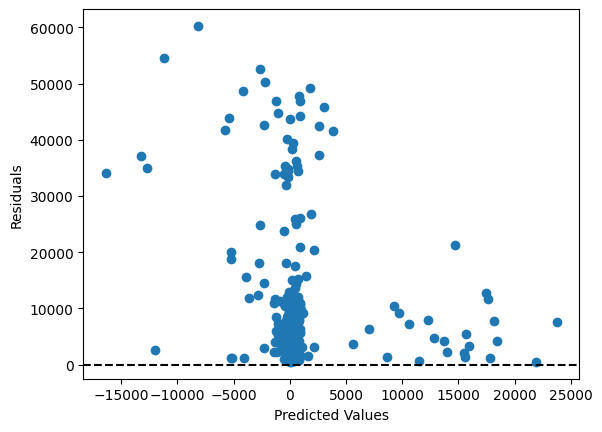

In [59]:
# 모델 평가
mse = mean_squared_error(y_test, p_test)
mae = mean_absolute_error(y_test, p_test)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, p_test)

print('Validation Set:')
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAPE:', mape)

# 잔차 그래프 그리기
p_test = y_test - p_test
plt.scatter(p_test, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='black', linestyle='--')
# plt.xscale('log')
# plt.yscale('log')
plt.show()